In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("input.csv", delimiter=",")
df = df.drop(columns=["name","description","temperament"]) # Retira-se nome, descrição e temperamento, pois são irrelevantes para o processamento
df["group"] = df["group"].replace(["Foundation Stock Service","Miscellaneous Class"],"Foundation and miscellaneous")

#### Ao ler os dados, é notavel que os valores para: grooming_frequency, shedding, energy_level, trainability e demeanor são equivalentes a sua categoria, logo, pode-se ignorar todas as colunas que terminem com "category" visto que são dados redundantes

In [110]:
df = df.drop(columns=["grooming_frequency_category","shedding_category","energy_level_category","trainability_category","demeanor_category"])
df

,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,148,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
1,113,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
2,60,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
3,47,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
4,58,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,167,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
273,NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation and miscellaneous,0.2,0.6,0.8,0.4,0.6
274,140,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
275,NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation and miscellaneous,0.4,0.6,0.8,0.2,0.4


#### Devido a quase 30% dos dados estarem sem o atributo "popularity" decidi por não incluir esse atributo

In [111]:
df = df.drop(columns="popularity")


In [112]:
le = preprocessing.LabelEncoder() #transforma atributo 'group' em número
df["group"] = le.fit_transform(df["group"])
        

#### Plotagem do gráfico de correlação

In [113]:
corr= df.corr()
corr

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
min_height,1.000000,0.935146,0.815263,0.792409,-0.460569,-0.463709,-0.080873,-0.186637,0.285123,0.174194,-0.049236,-0.239074
max_height,0.935146,1.000000,0.793010,0.806405,-0.441227,-0.467058,-0.151818,-0.244199,0.320306,0.198560,-0.051842,-0.294494
min_weight,0.815263,0.793010,1.000000,0.947519,-0.541745,-0.551445,-0.003846,-0.138691,0.284724,-0.072179,-0.132576,-0.276253
max_weight,0.792409,0.806405,0.947519,1.000000,-0.513515,-0.522455,-0.009515,-0.116240,0.281833,-0.076534,-0.075793,-0.273650
min_expectancy,-0.460569,-0.441227,-0.541745,-0.513515,1.000000,0.765434,-0.114039,0.028934,-0.251795,-0.000183,0.091815,0.181565
max_expectancy,-0.463709,-0.467058,-0.551445,-0.522455,0.765434,1.000000,-0.023158,0.127438,-0.356471,0.012556,0.094136,0.168534
group,-0.080873,-0.151818,-0.003846,-0.009515,-0.114039,-0.023158,1.000000,0.252073,-0.106277,-0.016889,0.018315,0.205837
grooming_frequency_value,-0.186637,-0.244199,-0.138691,-0.116240,0.028934,0.127438,0.252073,1.000000,-0.070256,-0.151441,0.098834,0.112278
shedding_value,0.285123,0.320306,0.284724,0.281833,-0.251795,-0.356471,-0.106277,-0.070256,1.000000,0.173437,0.043577,-0.179746
energy_level_value,0.174194,0.198560,-0.072179,-0.076534,-0.000183,0.012556,-0.016889,-0.151441,0.173437,1.000000,0.119501,-0.003133


#### Pelo gráfico de correlação, é notável que há uma correlação entre min e max height e weight, assim como min e max expectancy. Irei agrupa-los

In [114]:
# Size define a junção das médias das alturas com a média dos pesos, o peso é em geral menor que a altura,
# então para igualar eu divido em uma parte maior a altura
df["size"] = (df["min_height"] + df["max_height"])/2 + (df["min_weight"] + df["max_weight"])/2
df["avg_expectancy"] = (df["min_expectancy"] + df["max_expectancy"])/2
df = df.drop(columns=["min_height","min_weight","min_expectancy","max_height","max_weight","max_expectancy"])
df

,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,size,avg_expectancy
0,6,0.6,0.6,0.6,0.8,1.0,29.890535,13.5
1,2,0.8,0.2,0.8,0.2,0.2,90.987580,13.5
2,5,0.6,0.4,0.6,1.0,0.8,85.635542,12.5
3,7,0.8,0.6,0.8,1.0,0.6,111.399237,11.5
4,7,0.6,0.6,0.8,0.4,0.8,97.247390,12.0
...,...,...,...,...,...,...,...,...
272,4,0.2,0.6,0.8,0.6,0.6,84.002580,13.0
273,0,0.2,0.6,0.8,0.4,0.6,75.838064,13.5
274,3,0.2,0.2,0.8,0.6,0.6,56.651752,15.5
275,0,0.4,0.6,0.8,0.2,0.4,77.425638,11.0


In [115]:
corr = df.corr()
corr

,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,size,avg_expectancy
group,1.000000,0.252073,-0.106277,-0.016889,0.018315,0.205837,-0.066872,-0.070495
grooming_frequency_value,0.252073,1.000000,-0.070256,-0.151441,0.098834,0.112278,-0.181362,0.085514
shedding_value,-0.106277,-0.070256,1.000000,0.173437,0.043577,-0.179746,0.312244,-0.325147
energy_level_value,-0.016889,-0.151441,0.173437,1.000000,0.119501,-0.003133,0.056438,0.006894
trainability_value,0.018315,0.098834,0.043577,0.119501,1.000000,0.334465,-0.078794,0.098587
demeanor_value,0.205837,0.112278,-0.179746,-0.003133,0.334465,1.000000,-0.288830,0.185147
size,-0.066872,-0.181362,0.312244,0.056438,-0.078794,-0.288830,1.000000,-0.558630
avg_expectancy,-0.070495,0.085514,-0.325147,0.006894,0.098587,0.185147,-0.558630,1.000000


#### Com os agrupamentos feitos, os atributos tem pouquissima correlação entre si.

In [116]:

print('Valores faltantes:\n', df.isnull().sum())

Valores faltantes:
 group                        0
grooming_frequency_value     7
shedding_value              20
energy_level_value           6
trainability_value          24
demeanor_value              25
size                         2
avg_expectancy               3
dtype: int64


In [117]:
# No conjunto de dados, muitos dos dados que possuem atributos faltantes, possuem mais de um atributo faltante, e apesar de ter quase 90 atributos faltantes
# Apenas 41 Valores serão perdidos com o expurgo total dos dados incompletos


df = df.dropna(how ='any') #elimina todas as linhas com dados ausentes

df


,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,size,avg_expectancy
0,6,0.6,0.6,0.6,0.8,1.0,29.890535,13.5
1,2,0.8,0.2,0.8,0.2,0.2,90.987580,13.5
2,5,0.6,0.4,0.6,1.0,0.8,85.635542,12.5
3,7,0.8,0.6,0.8,1.0,0.6,111.399237,11.5
4,7,0.6,0.6,0.8,0.4,0.8,97.247390,12.0
...,...,...,...,...,...,...,...,...
272,4,0.2,0.6,0.8,0.6,0.6,84.002580,13.0
273,0,0.2,0.6,0.8,0.4,0.6,75.838064,13.5
274,3,0.2,0.2,0.8,0.6,0.6,56.651752,15.5
275,0,0.4,0.6,0.8,0.2,0.4,77.425638,11.0


#### Decido plotar o gráfico de cada um para buscar valores que não fazem sentido, para garantir a qualidade dos dados

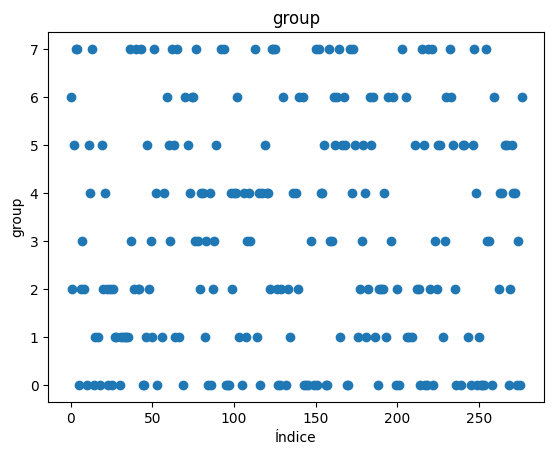

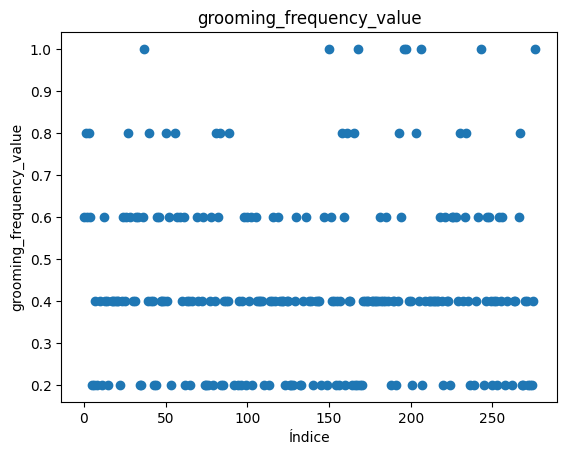

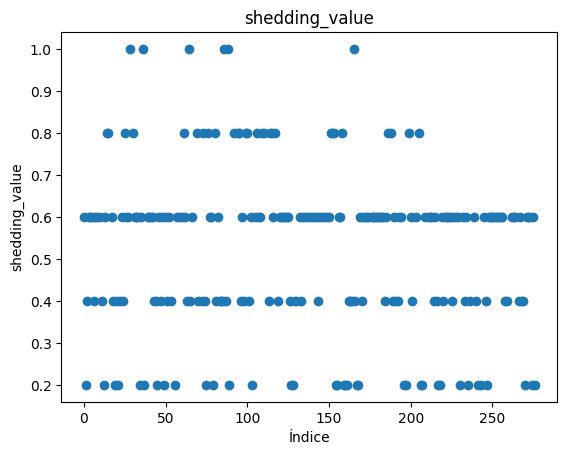

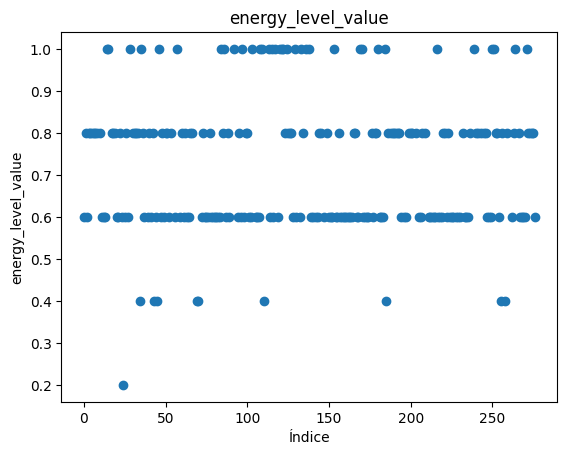

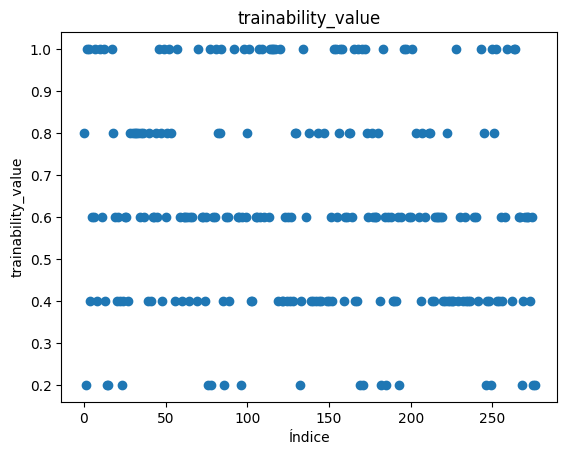

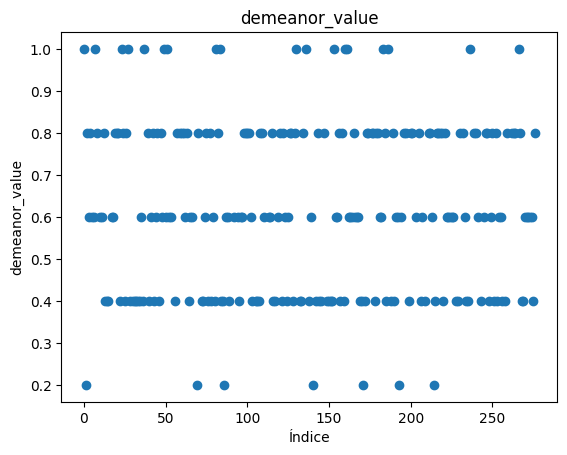

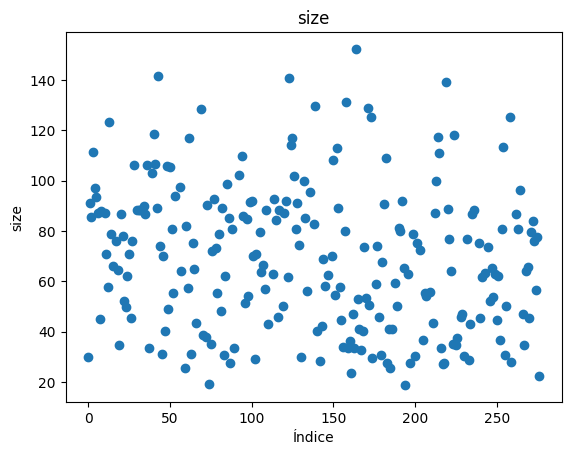

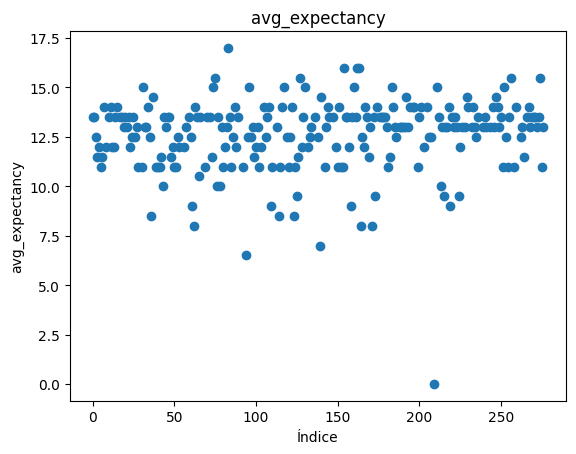

In [118]:
for column in df.columns:
    plt.figure()
    plt.plot(df.index, df[column], marker='o', linestyle='None')
    plt.title(column)
    plt.xlabel('Índice')
    plt.ylabel(column)
    plt.show()

#### Para a coluna 'energy_value' há apenas um com o valor 0.2, porém aparentemente é um outlier, visto que tem uma categoria só para ele, chamada 'couch potato', então não irei o retirar. É perceptivel também, que para o 'grupo 3', há uma menor quantidade de dados, portanto, irei aplicar o boosting. É notavel também que o atributo "avg_expectancy" quase não tem variação, então irei retira-lo, pois não agrega em nada para o modelo

In [119]:
df = df.drop(columns="avg_expectancy")
# Selecionar todos os dados do grupo 3
group_3_data = df[df['group'] == 3]

# Duplicar os dados do grupo 3
df = pd.concat([df, group_3_data], ignore_index=True)

In [120]:
from sklearn.preprocessing import MinMaxScaler

# Excluir a coluna 'group' antes de normalizar
df_without_group = df.drop('group', axis=1)

# Criar um objeto MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalizar os dados usando MinMaxScaler
df_normalized = min_max_scaler.fit_transform(df_without_group)

# Criar um novo DataFrame com os dados normalizados
df_normalized = pd.DataFrame(df_normalized, columns=df_without_group.columns)


In [121]:
df_normalized.to_csv("Processed_data.csv",index=False)
df["group"].to_csv("grupos.csv",index=False)